In [24]:
!pip install spacy

In [25]:
!python -m spacy download en_core_web_md 

                                              0.0/42.8 MB ? eta -:--:--
                                              0.2/42.8 MB 6.6 MB/s eta 0:00:07
     -                                        1.1/42.8 MB 14.6 MB/s eta 0:00:03
     -                                        1.6/42.8 MB 12.6 MB/s eta 0:00:04
     --                                       2.9/42.8 MB 16.6 MB/s eta 0:00:03
     ----                                     4.3/42.8 MB 19.6 MB/s eta 0:00:02
     -----                                    6.2/42.8 MB 24.9 MB/s eta 0:00:02
     --------                                 8.8/42.8 MB 28.0 MB/s eta 0:00:02
     ----------                              11.7/42.8 MB 43.5 MB/s eta 0:00:01
     -------------                           14.4/42.8 MB 54.7 MB/s eta 0:00:01
     ---------------                         16.8/42.8 MB 59.5 MB/s eta 0:00:01
     -----------------                       18.7/42.8 MB 50.4 MB/s eta 0:00:01
     -------------------                     21.4

In [26]:
import matplotlib.pyplot as plt

## Word2vec embeddings

In [27]:
import spacy

In [28]:
# Load the pre-trained model
nlp = spacy.load("en_core_web_md")

### Lucia

In [29]:
# Define the words whose distance you want to compute
word1 = "teeth"
word2 = "breakfast"

# Obtain the vector embeddings for each word
vector1 = nlp(word1).vector
vector2 = nlp(word2).vector

# Compute the distance between the two vector embeddings
distance_lucia = nlp("teeth").similarity(nlp("breakfast"))

# Print the distance
print("Distance between", word1, "and", word2, "is:", round(distance_lucia, 4))

Distance between teeth and breakfast is: 0.192


### Cata

In [30]:
# Define the words whose distance you want to compute
word1 = "sleep"
word2 = "breakfast"

# Obtain the vector embeddings for each word
vector1 = nlp(word1).vector
vector2 = nlp(word2).vector

# Compute the distance between the two vector embeddings
distance_cata = nlp("sleep").similarity(nlp("breakfast"))

# Print the distance
print("Distance between", word1, "and", word2, "is:", round(distance_cata, 4))

Distance between sleep and breakfast is: 0.4102


### Comparison

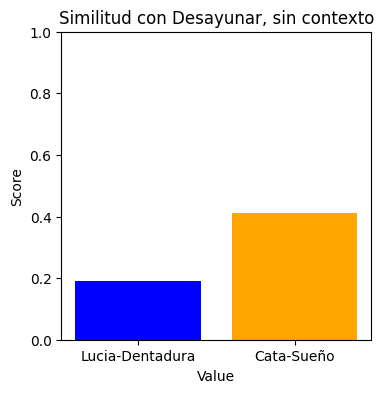

In [32]:
# Create a bar plot
fig = plt.figure(figsize=(4, 4))
colors = ['blue', 'orange']
plt.bar([1, 2], [distance_lucia, distance_cata], color=colors)

# Set the x-axis tick labels
plt.xticks([1, 2], ['Lucia-Dentadura', 'Cata-Sueño'])

# Set the plot title and axis labels
plt.ylim([0, 1])
plt.title('Similitud con Desayunar, sin contexto')
plt.xlabel('Value')
plt.ylabel('Score')

# Display the plot
plt.show()

## BERT embeddings

In [1]:
!pip install --upgrade pip
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117
!pip install torch
!pip install PyTorch
#!pip uninstall numpy
!python -m pip install numpy --upgrade
# pip install numpy --force-reinstall
# pip install numpy==1.24.1

Looking in indexes: https://download.pytorch.org/whl/cu117


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [6 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\Usuario\AppData\Local\Temp\pip-install-skcrmlzt\pytorch_7ec5385ec00f4e89a80a6fe61e7cda42\setup.py", line 15, in <module>
      raise Exception(message)
  Exception: You tried to install "pytorch". The package named for PyTorch is "torch"
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for PyTorch
ERROR: Could not build wheels for PyTorch, which is required to install pyproject.toml-based projects


  Using cached pytorch-1.0.2.tar.gz (689 bytes)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for PyTorch
Failed to build PyTorch


In [ ]:
import numpy
numpy.version.version

In [12]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
# import tensorflow as tf

In [4]:
# Load the pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [5]:
model = AutoModel.from_pretrained(model_name)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


### Lucia

In [71]:
# Define the sentence context and the words whose distance you want to compute
context = "When I eat breakfast I chew my food with my teeth."
word1 = "teeth"
word2 = "breakfast"

# Tokenize the sentence context
tokens = tokenizer.tokenize(context)

# Convert the tokens to IDs
ids = tokenizer.convert_tokens_to_ids(tokens)

# Convert the IDs to PyTorch tensor
pt_ids = torch.tensor(ids)

# Get the BERT embeddings for the sentence
with torch.no_grad():
    outputs = model(pt_ids.unsqueeze(0))
    sentence_emb = outputs[0][0]  # Shape: (seq_len, hidden_size)  
    
# Get the word embedding for 'teeth'
teeth_token = tokenizer.tokenize('teeth')[0]
teeth_idx = tokens.index(teeth_token)
teeth_emb = sentence_emb[teeth_idx].detach().numpy()  # Shape: (hidden_size,)

# Get the word embedding for 'breakfast'
breakfast_token = tokenizer.tokenize('breakfast')[0]
breakfast_idx = tokens.index(breakfast_token)
breakfast_emb = sentence_emb[breakfast_idx].detach().numpy()  # Shape: (hidden_size,)

# Cosine similarity
similarity = cosine_similarity(sleep_emb.reshape(1, -1), breakfast_emb.reshape(1, -1))
distance_lucia_BERT = similarity[0][0]

# Print the distance
print("Distance between", word1, "and", word2, "in the sentence context: ", context, " is:", round(distance_lucia_BERT, 4))

Distance between teeth and breakfast in the sentence context:  When I eat breakfast I chew my food with my teeth.  is: 0.6216


### Cata

In [74]:
# Define the sentence context
context = "I went to have a coffee for breakfast to get rid of sleep."
word1 = "sleep"
word2 = "breakfast"

# Tokenize the sentence context
tokens = tokenizer.tokenize(context)

# Convert the tokens to IDs
ids = tokenizer.convert_tokens_to_ids(tokens)

# Convert the IDs to PyTorch tensor
pt_ids = torch.tensor(ids)

# Get the BERT embeddings for the sentence
with torch.no_grad():
    outputs = model(pt_ids.unsqueeze(0))
    sentence_emb = outputs[0][0]  # Shape: (seq_len, hidden_size)  
    
# Get the word embedding for 'sleep'
sleep_token = tokenizer.tokenize('sleep')[0]
sleep_idx = tokens.index(sleep_token)
sleep_emb = sentence_emb[sleep_idx].detach().numpy()  # Shape: (hidden_size,)

# Get the word embedding for 'breakfast'
breakfast_token = tokenizer.tokenize('breakfast')[0]
breakfast_idx = tokens.index(breakfast_token)
breakfast_emb = sentence_emb[breakfast_idx].detach().numpy()  # Shape: (hidden_size,)

# Cosine similarity
similarity = cosine_similarity(sleep_emb.reshape(1, -1), breakfast_emb.reshape(1, -1))
distance_cata_BERT = similarity[0][0]

# Print the distance
print("Distance between", word1, "and", word2, "in the sentence context: ", context, " is:", round(distance_cata_BERT, 4))

Distance between sleep and breakfast in the sentence context:  I went to have a coffee for breakfast to get rid of sleep.  is: 0.7955


### Comparison

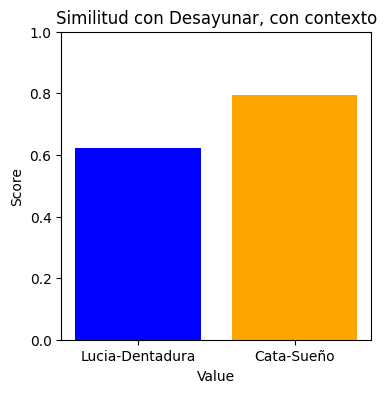

In [75]:
# Create a bar plot
fig = plt.figure(figsize=(4, 4))
colors = ['blue', 'orange']
plt.bar([1, 2], [distance_lucia_BERT, distance_cata_BERT], color=colors)

# Set the x-axis tick labels
plt.xticks([1, 2], ['Lucia-Dentadura', 'Cata-Sueño'])

# Set the plot title and axis labels
plt.ylim([0, 1])
plt.title('Similitud con Desayunar, con contexto')
plt.xlabel('Value')
plt.ylabel('Score')

# Display the plot
plt.show()